# Stratified Random Sampling to Improve Machine Learning Algorithm in South Jakarta House Price Prediction
## Author: Edycakra Immanuel Sinaga


In [44]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load Dataset

In [45]:
# this is the previous machine learning dataset (clean)
# df = pd.read_csv('../data/processed/olx_house_processed_ENG.csv', encoding='latin-1')
df = pd.read_csv('../data/final/olx_house_final_improve_ENG.csv', encoding='latin-1')

In [46]:
df.head()


,NBED,NBATH,NFLOOR,BLDAR,LNDAR,CERT,LOC,Price
0,6,1,1,148,148,SHM,Setia Budi,1100000000
1,5,4,3,84,200,SHM,Tebet,2100000000
2,3,3,2,134,130,SHM,Pasar Minggu,2800000000
3,3,2,1,132,100,SHM,Pesanggrahan,1480000000
4,3,4,2,92,147,SHM,Pesanggrahan,2300000000


In [47]:
# this is data of number of population in each kecamatan in south jakarta (gathered from jakarta.bps.go.id)
population = [["Tebet", 221216], ["Pesanggrahan", 246878 ], ["Cilandak", 201588 ], ["Mampang Prapatan", 145359], ["Setia Budi", 107423], ["Kebayoran Lama", 308542], ["Kebayoran Baru", 139562 ], ["Pasar Minggu", 304271], ["Pancoran", 168583], ["Jagakarsa", 383390 ]]

df_pop = pd.DataFrame(population, columns=["Kecamatan", "Populasi"])

df_pop

,Kecamatan,Populasi
0,Tebet,221216
1,Pesanggrahan,246878
2,Cilandak,201588
3,Mampang Prapatan,145359
4,Setia Budi,107423
5,Kebayoran Lama,308542
6,Kebayoran Baru,139562
7,Pasar Minggu,304271
8,Pancoran,168583
9,Jagakarsa,383390


### Count the Number of Kecamatan in ML Dataset

In [48]:
df_init = df['LOC']. value_counts()

In [49]:
#number of house listed in each kecamatan
df_init

Pesanggrahan        46
Cilandak            46
Pasar Minggu        41
Mampang Prapatan    31
Kebayoran Baru      29
Pancoran            22
Kebayoran Lama      21
Tebet                1
Setia Budi           1
Name: LOC, dtype: int64

In [50]:
#number of population in each keacamatan
df_pop

,Kecamatan,Populasi
0,Tebet,221216
1,Pesanggrahan,246878
2,Cilandak,201588
3,Mampang Prapatan,145359
4,Setia Budi,107423
5,Kebayoran Lama,308542
6,Kebayoran Baru,139562
7,Pasar Minggu,304271
8,Pancoran,168583
9,Jagakarsa,383390


### Count the Proportion of Each Population in South Jakarta

In [51]:
prop_population = []
for index, kecamatan in enumerate(df_pop["Kecamatan"], start=0):   
    # print(kecamatan, df_pop["Populasi"][index]/sum(df_pop["Populasi"]))
    prop_population.append([kecamatan, round(df_pop["Populasi"][index]/sum(df_pop["Populasi"]), 4)])
# prop_population

df_prop_population = pd.DataFrame(prop_population, columns=["Kecamatan", "ProporsiPopulasi"])


df_sortedName_population = df_prop_population.sort_values("Kecamatan")

df_sortedName_population.reset_index(drop=True)

,Kecamatan,ProporsiPopulasi
0,Cilandak,0.0905
1,Jagakarsa,0.1722
2,Kebayoran Baru,0.0627
3,Kebayoran Lama,0.1386
4,Mampang Prapatan,0.0653
5,Pancoran,0.0757
6,Pasar Minggu,0.1366
7,Pesanggrahan,0.1109
8,Setia Budi,0.0482
9,Tebet,0.0993


### Count the Proportion of Each Sample in Listed House in South Jakarta

In [52]:
prop_sample = []
for index, kecamatan in enumerate(df_init, start=0):   
    prop_sample.append([df_init.keys()[index], round(df_init[df_init.keys()[index]]/sum(df_init), 4)])
prop_sample

df_prop_sample = pd.DataFrame(prop_sample, columns=["Kecamatan", "ProporsiRumah"])

df_sortedName_sample = df_prop_sample.sort_values("Kecamatan")

df_sortedName_sample.reset_index(drop=True)

,Kecamatan,ProporsiRumah
0,Cilandak,0.1933
1,Kebayoran Baru,0.1218
2,Kebayoran Lama,0.0882
3,Mampang Prapatan,0.1303
4,Pancoran,0.0924
5,Pasar Minggu,0.1723
6,Pesanggrahan,0.1933
7,Setia Budi,0.0042
8,Tebet,0.0042


### Plot for Proportion Comparison

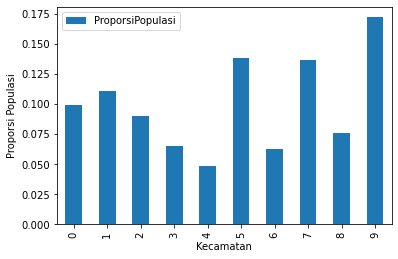

In [53]:
ax1 = df_prop_population.plot(kind='bar')
ax1.set_xlabel("Kecamatan")
ax1.set_ylabel("Proporsi Populasi")

plt.show()

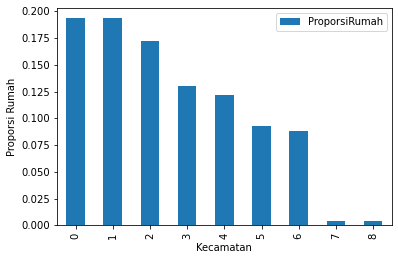

In [54]:
ax2 = df_prop_sample.plot(kind='bar')
ax2.set_xlabel("Kecamatan")
ax2.set_ylabel("Proporsi Rumah")

plt.show()

### Resampling Data menurut Proporsi Populasi

In [55]:
# Function to stratify data
def stratify_data(df_data, stratify_column_name, stratify_values, stratify_proportions, random_state=None):
    """Stratifies data according to the values and proportions passed in
    Args:
        > df_data (DataFrame): data source
        > stratify_column_name (str): The name of the single column in the dataframe that holds the data values that will be used to stratify the data
        > stratify_values (list of str): A list of all of the potential values for stratifying e.g. "Cilandak", etc
        > stratify_proportions (list of float): A list of numbers representing the desired propotions. 
        The list values must add up to 1 and must match the number of values in stratify_values.
        > random_state (int, optional): sets the random_state. Defaults to None.
    Returns:
        > New DataFrame: a new dataframe based on df_data that has the new proportions 
    """
    # Create an empty DataFrame with column names matching df_data
    df_stratified = pd.DataFrame(columns = df_data.columns) 
    # print(df_stratified)
    for index, item in enumerate(stratify_values, start=1):
        # print(item, index)
        # print(stratify_column_name, item)

        df_filtered = df_data.loc[(df_data[stratify_column_name] == item)]

        sample_amount = int(stratify_proportions[index-1] * len(df_data))
        if sample_amount < 1:
            sample_amount = 1 #this is important to keep the scarce data
        if len(df_filtered) < sample_amount:
            sample_amount = len(df_filtered) #this is important to keep the scarce data
        # print(stratify_proportions[index-1], len(df_data), sample_amount, len(df_filtered))
        df_temp = df_filtered.sample(n=sample_amount, random_state=random_state)
        df_stratified = pd.concat([df_stratified, df_temp]) 
    
        
    return df_stratified    

In [56]:
#array of name based of kecamatan
stratify_values = df_sortedName_population["Kecamatan"].to_numpy()

#array of proportion from population
stratify_proportions = df_sortedName_population["ProporsiPopulasi"].to_numpy()
df_stratified = stratify_data(df, 'LOC', stratify_values, stratify_proportions, )

In [57]:
df_stratified.head()

,NBED,NBATH,NFLOOR,BLDAR,LNDAR,CERT,LOC,Price
170,5,4,2,107,167,SHM,Cilandak,2000000000
157,3,2,2,95,105,SHM,Cilandak,1800000000
6,3,2,2,83,75,SHM,Cilandak,885000000
126,4,3,2,86,120,SHM,Cilandak,950000000
146,4,4,2,110,140,SHM,Cilandak,2640000000


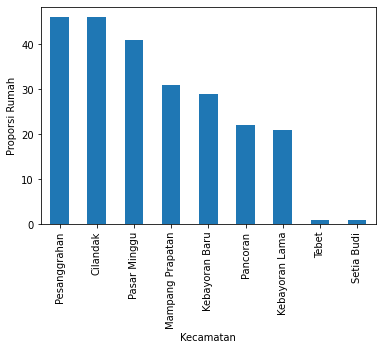

In [58]:
# Before Stratifed Random Sampling
ax2 = df['LOC'].value_counts().plot(kind='bar')
ax2.set_xlabel("Kecamatan")
ax2.set_ylabel("Proporsi Rumah")

plt.show()

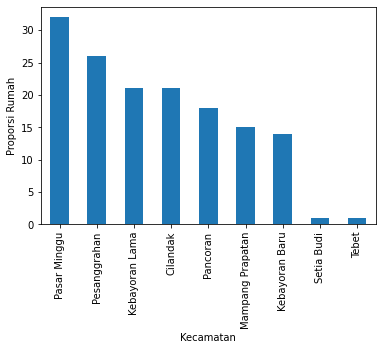

In [59]:
# After Stratified Random Sampling
ax2 = df_stratified['LOC'].value_counts().plot(kind='bar')
ax2.set_xlabel("Kecamatan")
ax2.set_ylabel("Proporsi Rumah")

plt.show()

In [60]:
df.shape

(238, 8)

In [61]:
df_stratified.shape

(149, 8)

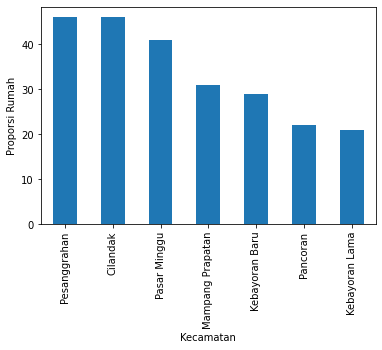

In [62]:
#without setiabudi, tebet, and jagakarsa
df_limited = df.loc[(df['LOC'] != "Setia Budi")]
df_limited = df_limited.loc[(df['LOC'] != "Tebet")]
df_limited = df_limited.loc[(df['LOC'] != "Jagakarsa")]


ax3 = df_limited['LOC'].value_counts().plot(kind='bar')
ax3.set_xlabel("Kecamatan")
ax3.set_ylabel("Proporsi Rumah")

plt.show()

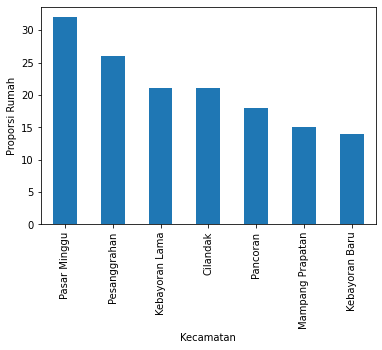

In [63]:
#without setiabudi, tebet, and jagakarsa (STRATIFIED)
df_limited_s = df_stratified.loc[(df['LOC'] != "Setia Budi")]
df_limited_s = df_limited_s.loc[(df['LOC'] != "Tebet")]
df_limited_s = df_limited_s.loc[(df['LOC'] != "Jagakarsa")]


ax4 = df_limited_s['LOC'].value_counts().plot(kind='bar')
ax4.set_xlabel("Kecamatan")
ax4.set_ylabel("Proporsi Rumah")

plt.show()

In [64]:
#write to csv 
df_stratified.to_csv('../data/final/olx_house_stratified_ENG.csv', index=False)


In [65]:
#write to csv (no tebet and setiabudi, stratified)
df_limited_s.to_csv('../data/final/olx_house_stratified_c_ENG.csv', index=False)


### Observation and Conclusion

The stratified data shows better proportion compared with the initial data. Some Kecamatan have too low amount of data (Tebet, Setia Budi, Jagakarsa only have 1 house listed on OLX website). 

The next study will be about comparison of the ML accuracy between the initial sample data and the resampled data.